# Customer Churn Prediction Model - Modeling

**Project Goal:**  
Build a machine learning model to predict which telecom customers are likely to churn, based on the cleaned and processed dataset from `01_data_exploration.ipynb`.


## Notebook Structure

1. **Introduction & Data Loading**  
2. **Data Preprocessing & Encoding**  
3. **Feature-Target Split**  
4. **Train-Test Split**  
5. **Model Selection & Training**  
6. **Model Evaluation**  
7. **Feature Importance Analysis**  
8. **Saving the Model**

---

### Notes
- We will use **Gradient Boosting Classifier** for modeling (robust and interpretable).  
- All categorical variables will be **encoded using one-hot encoding**.  
- Target variable `Churn` will be encoded as **0 = No,**


In [1]:
# Step 1: Load processed dataset
import pandas as pd

df = pd.read_csv('../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-processed.csv')

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Data Overview

- Loaded the **processed dataset** from the previous notebook.  
- Dataset is **cleaned and ready for modeling**:  
    - No missing values  
    - `TotalCharges` converted to numeric  
    - Categorical features intact  
- We'll now encode the categorical features to prepare for machine learning.


## 2. Data Preprocessing & Encoding

Before modeling, we need to:

1. Encode the **target variable** `Churn` (No → 0, Yes → 1).  
2. Convert all **categorical features** into numeric format using **one-hot encoding**.  
3. Ensure the dataset is ready for model training.


In [2]:
# ----------------------------
# Encode target
# ----------------------------
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [3]:
# ----------------------------
# Binary columns
# ----------------------------
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Clean strings: strip spaces, title-case
for col in binary_cols:
    df[col] = df[col].str.strip().str.title()

# Map 0/1
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
df['Partner'] = df['Partner'].map({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1})
df['PhoneService'] = df['PhoneService'].map({'No':0, 'Yes':1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No':0, 'Yes':1})


In [4]:
# ----------------------------
# Multi-category columns (>2 categories)
# ----------------------------
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [5]:
# ----------------------------
# Verify
# ----------------------------
print("Shape after encoding:", df_encoded.shape)
print("Sample columns:", df_encoded.columns[:20])
df_encoded.head()

Shape after encoding: (7043, 32)
Sample columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


## 3: Train-Test Split

**Goal:**  
Separate the dataset into **features (`X`)** and **target (`y`)**, and create **training** and **testing** sets.  

**Why:**  
- The model learns patterns from the **training set**.  
- The **testing set** evaluates how well the model performs on **unseen data**.  
- Ensures that the model generalizes and does not just memorize the data.

**Key considerations:**  
- Use an **80/20 split** (or similar) between train and test.  
- **Stratify** by the target variable (`Churn`) to maintain the same proportion of churned vs non-churned customers in both sets.  
- Set a **random seed** (`random_state`) for reproducibility.


In [6]:
# Drop customerID (identifier)
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

In [7]:
# Split 80/20 train-test with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5634, 30)
Test shape: (1409, 30)


## 4: Baseline Model

- Start with a simple, interpretable model like `Logistic Regression` or `Random Forest.`
- **Why**: Baseline gives a performance reference.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = GradientBoostingClassifier(random_state=42)


In [10]:
# Train
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7991483321504613
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<div style="border: 2px solid #2ecc71; padding: 15px; border-radius: 10px; background-color: #f0f9f5;">
    <h3 style="color:#2ecc71;">4. Baseline Model Evaluation - Interpretation</h3>
    <p><strong>Accuracy:</strong> 0.80 (~80%)</p>
    <p><strong>Precision:</strong> Stayed = 0.84, Churned = 0.66</p>
    <p><strong>Recall:</strong> Stayed = 0.90, Churned = 0.51</p>
    <p><strong>F1-score:</strong> Stayed = 0.87, Churned = 0.57</p>
    <p><strong>Support:</strong> Stayed = 1,035, Churned = 374</p>
    <h4 style="color:#2ecc71;">Key Insights:</h4>
    <ul>
        <li>The model correctly predicts <strong>80% of all customers</strong>, but accuracy is influenced by the class imbalance (74% stayed, 26% churned).</li>
        <li>It is more confident in predicting <strong>customers who stay</strong> than those who churn.</li>
        <li><strong>Recall for churned customers is 0.51</strong> — meaning almost half of the at-risk customers are not detected.</li>
        <li>F1-scores reflect that performance is better for stayed customers (0.87) vs churned (0.57).</li>
        <li>Business implication: The model can be a starting point, but we need to improve detection of churners to target retention effectively.</li>
    </ul>
</div>


## 5. Feature Importance

**Goal:**  
Identify which features contribute the most to predicting customer churn.  

**Why it matters:**  
- Helps the business understand **key drivers of churn**.  
- Guides **feature selection** for modeling.  
- Provides actionable insights for **retention strategies**.  

**Approach:**  
- Use the feature importance from the **trained Gradient Boosting model**.  
- Visualize top features with a **bar chart** to easily interpret which factors impact churn the most.


In [13]:
# Extract feature importance from the already trained model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,   # all feature column names
    'Importance': model.feature_importances_  # use the model from Step 4
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
feature_importance.head(10)


,Feature,Importance
4,tenure,0.296640
11,InternetService_Fiber optic,0.187939
28,PaymentMethod_Electronic check,0.124218
26,Contract_Two year,0.074378
8,TotalCharges,0.069447
25,Contract_One year,0.059660
7,MonthlyCharges,0.054728
6,PaperlessBilling,0.022788
14,OnlineSecurity_Yes,0.018214
19,TechSupport_No internet service,0.017022


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


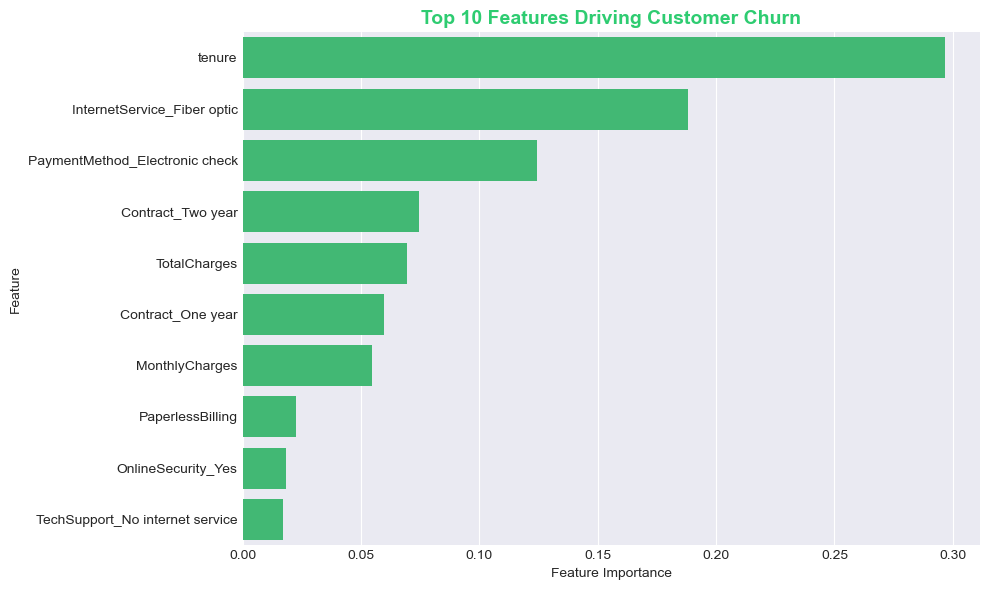

In [17]:

# Take top 10 features for plotting
top_features = feature_importance.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_features, 
    y='Feature', 
    x='Importance', 
    palette=['#2ecc71']*len(top_features)  # green color
)

plt.title('Top 10 Features Driving Customer Churn', fontsize=14, fontweight='bold', color='#2ecc71')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Step 6: Model Diagnostics

**Goal:**
Check how well our model generalizes and whether it might be **overfitting** or **underfitting.**

**What we’ll do:**

1. Compare train vs test accuracy.
2. Display confusion matrix for the test set.
3. Optionally, plot a learning curve.

In [18]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:     {test_acc:.2f}")


Training Accuracy: 0.83
Test Accuracy:     0.80


<div style="background-color:#ecf9f1; padding:15px; border-left:5px solid #2ecc71; font-family:Arial, sans-serif;">
<h3 style="color:#2ecc71;">Training vs Test Accuracy</h3>
<p>
- <strong>Training Accuracy:</strong> 0.83 (83%)<br>
- <strong>Test Accuracy:</strong> 0.80 (80%)
</p>
<p>
<strong>Interpretation:</strong> 
The model performs well on both training and test sets. The difference is small (~3%), which indicates:
<ul>
<li>The model is <strong>generalizing well</strong>.</li>
<li>There is <strong>slight overfitting</strong> (training is a bit higher than test), but it is minor.</li>
<li>Overall, the model is balanced — not underfitting and not severely overfitting.</li>
</ul>
</p>
<p>
Next steps: Check <strong>confusion matrix</strong> to see where the model makes errors, especially for churned customers.
</p>
</div>


In [20]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_test_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Assign values
tn, fp, fn, tp = cm.ravel()

# Display nicely
print(f"Confusion Matrix (Test Set):")
print(f"---------------------------------")
print(f"True Negatives  (Stayed & predicted Stayed): {tn}")
print(f"False Positives (Stayed & predicted Churned): {fp}")
print(f"False Negatives (Churned & predicted Stayed): {fn}")
print(f"True Positives  (Churned & predicted Churned): {tp}")


Confusion Matrix (Test Set):
---------------------------------
True Negatives  (Stayed & predicted Stayed): 935
False Positives (Stayed & predicted Churned): 100
False Negatives (Churned & predicted Stayed): 183
True Positives  (Churned & predicted Churned): 191


<div style="background-color:#ecf9f1; padding:15px; border-left:5px solid #2ecc71; font-family:Arial, sans-serif;">
<h3 style="color:#2ecc71;">Confusion Matrix Summary (Test Set)</h3>

<p><strong>Matrix Values:</strong></p>
<ul>
<li>True Negatives (Stayed & predicted Stayed): 935</li>
<li>False Positives (Stayed & predicted Churned): 100</li>
<li>False Negatives (Churned & predicted Stayed): 183</li>
<li>True Positives (Churned & predicted Churned): 191</li>
</ul>

<p><strong>Insights:</strong></p>
<ul>
<li>Most non-churners are correctly identified (935 / 1035 ≈ 90%).</li>
<li>⚠️ Churned customers are harder to predict correctly (191 / 374 ≈ 51%).</li>
<li>❗ False negatives (183) are at-risk customers missed by the model — critical for retention strategies.</li>
<li>💡 False positives (100) are customers predicted to churn but actually stayed — less costly, but affects targeting efficiency.</li>
</ul>

<p><strong>Conclusion:</strong> The model predicts non-churners more reliably than churners. Improving recall for churned customers could increase business impact.</p>
</div>


## 7. Model Explainability with SHAP

Goal: Understand how each feature contributes to the model's predictions for churn. This helps validate the model and gives actionable business insights.


In [22]:
!pip install shap --quiet

import shap

In [23]:
# Use TreeExplainer for Gradient Boosting
explainer = shap.TreeExplainer(model)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test)


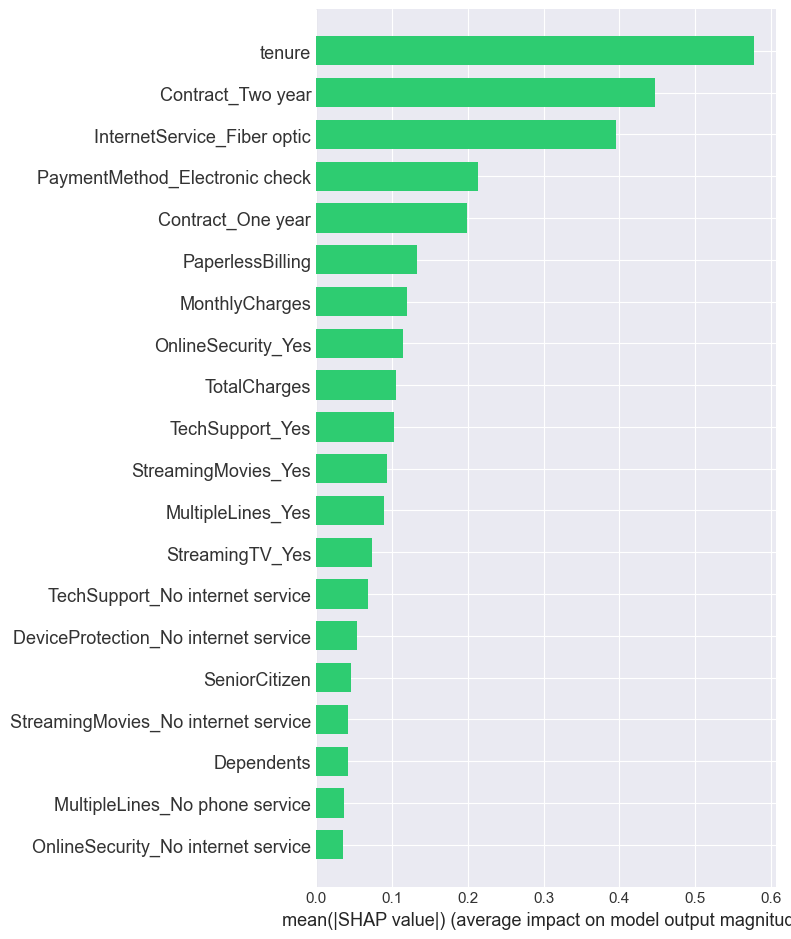

In [24]:
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#2ecc71')


<div style="border:2px solid #2ecc71; padding:20px; border-radius:10px; font-family:Arial, sans-serif; background-color:#f9f9f9;">
    <h2 style="color:#2ecc71;">Conclusions & Next Steps</h2>
    <h3 style="color:#2ecc71;">Model Conclusions</h3>
    <ul>
        <li><strong>Overall Accuracy:</strong> <span style="color:#2ecc71;">~80%</span></li>
        <li><strong>Non-churner Recall:</strong> <span style="color:#2ecc71;">~90%</span> — most staying customers are correctly predicted</li>
        <li><strong>Churner Recall:</strong> <span style="color:#e74c3c;">~51%</span> — some at-risk customers are missed</li>
        <li><strong>Key Churn Drivers:</strong> <span style="color:#2ecc71;">tenure, InternetService (Fiber optic), PaymentMethod (Electronic check), Contract type</span></li>
        <li>Model aligns with business intuition: new customers, month-to-month contracts, and certain services are more likely to churn</li>
    </ul>
    <h3 style="color:#e74c3c;">Limitations & Next Steps</h3>
    <ul>
        <li><span style="color:#e74c3c;">Recall for churned customers is low</span> — some at-risk customers may be missed</li>
        <li>Potential improvements if more time/resources: 
            <ul>
                <li>Class weighting or resampling (SMOTE/undersampling)</li>
                <li>Try alternative models (XGBoost, CatBoost)</li>
                <li>Tune prediction threshold to improve recall</li>
                <li>Use SHAP/LIME for deeper individual prediction explainability</li>
            </ul>
        </li>
    </ul>  
    <p style="color:#2ecc71;"><strong>The model is ready for deployment, and key insights are actionable for business retention strategies.</strong></p>
</div>


In [25]:
import joblib
import os

# Ensure the models folder exists
os.makedirs('../models/', exist_ok=True)

# Save the trained model
model_path = '../models/gb_churn_model.pkl'
joblib.dump(model, model_path)

print(f"Model saved successfully at {model_path}!")


Model saved successfully at ../models/gb_churn_model.pkl!


In [26]:
df.to_csv('../data/processed/telco_churn_for_dashboard.csv', index=False)
print("CSV saved for Power BI dashboard!")


CSV saved for Power BI dashboard!
